# Projet 1

In [1]:
import re
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy
import math
from community import community_louvain as louvain

In [2]:
book =  open("LOTR_ReturnOfTheKing.txt").read()
book_chapters = re.split(r"_Chapter \w+_",book)[1:]

In [3]:
Characters = [["aragorn","strider","the heir of isildur","king of gondor"], 
              ["arwen", "queen of gondor","evenstar"],
              ["bill ferny"], ["bilbo"],["boromir"], 
              ["beregond"],["bergil"],["butterbur","barliman"],
              ["celeborn", "lord of lothlórien"],
              ["denethor","steward of gondor"],
              ["elanor"],["elendil"],
              ["elladan"],
              ["elrond"],
              ["éomer"],["erestor"],
              ["éowyn","lady of rohan"],
              ["elrohir"],
              ["finduilas"],
              ['fredegar bolger',"fatty","fredegar"], 
              ["frodo","underhill"],
              ["gollum", "sméagol"],
              ["gwaihir"],
              ["faramir"],
              ["galadriel"],
              ["gandalf","mithrandir", "white rider","grey fool"],
              ["gimli"],
              ["glorfindel"],
              ["gothmog", "the lieutenant of morgul"],
              ["gríma","wormtongue"],
              ["imrahil","prince imrahil"],
              ["isildur"],
              ["king of the dead", "king of the mountains"],
              ["legolas"],
              ["lord of the nazgul","ringwraiths","black rider", "king of angmar"],
              ["lotho"],
              ["merry","meriadoc","brandybuck"],
              ["pippin","peregrin","tooks"],
              ["robin", "smallburrow"],
              ["rose cotton", "rosie"],
              ["sam","samwise","gamgee"],
              ["saruman"],
              ["sauron","lord of mordor","lord of the dark tower"],
              ["shadowfax"],
              ["shagrat"],
              ["shelob"],
              ["snaga"],
              ["the lieutenant of the tower","the mouth of sauron"],
              ["tom cotton","farmer cotton" ],
              ["théoden","king of the mark","lord of the mark"],
              ["treebeard","fangorn"],
              ["wídfara"]]

In [4]:
FirstName = [el[0] for el in Characters]
#print(FirstName)
#len(FirstName)

In [5]:
cleanedCharacters = [] # Les espaces des personnages avec des noms composés sont rempacés par des tirets-bas "_"

for i in Characters:
    new_sublist=[]
    for j in i:
        remplace = j.replace(" ","_")
        new_sublist.append(remplace)
    cleanedCharacters.append(new_sublist)

# Je réatribue à Character les personnages nettoyer
#print(len(Characters))

In [6]:
## CLEANING 

cleaned_parag =[]
for ChapterNb, Chapter in enumerate(book_chapters):
    paragraphsEnsemble = Chapter.split('\n\n')
    for parag in paragraphsEnsemble :
        parag_new = re.sub(r"[!?',;.:']", ' ', parag)
        cleaned_parag.append(parag_new.lower())
        
cleaned_final_parag=[] # Je remplace les paragraphes par des paragraphes avec les noms nettoyer.
for parag in cleaned_parag:
    remplace = parag
    for perso in range(len(Characters)):
        for nom in range(len(Characters[perso])):
            remplace = remplace.replace(Characters[perso][nom], cleanedCharacters[perso][nom])
    cleaned_final_parag.append(remplace)

cleaned_parag = cleaned_final_parag
#print(len(cleanedCharacters))
Characters = cleanedCharacters

#print(cleaned_parag)
#print(Characters)
#print(cleaned_parag)

Data transformation

In [7]:
CoocMatrix ={}
OccurenceList={} # number of times a characters is present

for parag in cleaned_parag: # Per paragraph, check if words are a Character

    List = []
    for w in parag.split(): # parcourir chaque mot
        for perso in Characters: # parcourir chaque personnage
            if w in perso: # si w fait parti de l'un des noms du personnagen alors on le met égal à son FirstName, ici = perso[0]
                w = perso[0]
                if w not in List:
                    List.append(w)
    
    n = len(List)
    for i in range(n):
        for j in range(i,n):
            if(i==j):
                OccurenceList[List[i]] = OccurenceList.get((List[i]) ,0)+1
            else:
                CoocMatrix[(List[i],List[j])] = CoocMatrix.get((List[i],List[j]) ,0)+1
                CoocMatrix[(List[j],List[i])] = CoocMatrix.get((List[j],List[i]) ,0)+1
        
#print(CoocMatrix)
#print()
#print(OccurenceList)

In [8]:
""""
# DataFrame Coocurence
df = pd.DataFrame(columns = FirstName, index = FirstName)
df[:] = int(0)

for (key1,key2) in CoocMatrix:
    df[key1][key2] = CoocMatrix[(key1,key2)]
#print(df)
print(len(df))"""

'"\n# DataFrame Coocurence\ndf = pd.DataFrame(columns = FirstName, index = FirstName)\ndf[:] = int(0)\n\nfor (key1,key2) in CoocMatrix:\n    df[key1][key2] = CoocMatrix[(key1,key2)]\n#print(df)\nprint(len(df))'

Coocumatrix is [52 rows x 52 columns]

Using this matrix, I am able to create two lists-One for the edges for the diagram represented in a tuple of form: (char1, char2, co-occurrence weight). I decided to make each weight a decimal in relation to the max occurrence seen: M

In [9]:
# M : Weight regulirizator
#M = df.to_numpy().max()
MostFrequentCharac = max(OccurenceList, key=OccurenceList.get)
print(MostFrequentCharac)
M = OccurenceList[MostFrequentCharac]
M

gandalf


71

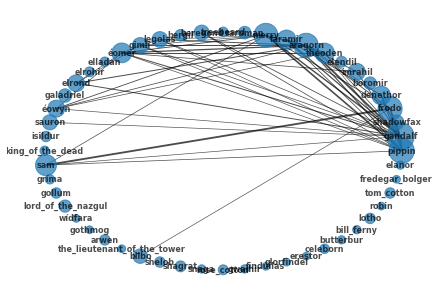

In [10]:
G = nx.Graph()
#nx.add_path(G,Characters)
NodesSize = list(OccurenceList.values()) # les occurences de chaque perso

G.add_nodes_from(OccurenceList.keys())

for (key1,key2) in CoocMatrix:
    G.add_edge(key1, key2, weight=CoocMatrix[key1,key2]/20) # 20 is just a constant to make the graph clearer
weights = [G[u][v]['weight'] for u,v in G.edges()]

first_quartile = np.quantile(weights, 0.9, axis=0)
weights = np.where(weights <= first_quartile, 0, weights)

nx.draw(G, 
        pos = nx.circular_layout(G), 
        node_size = [50 + x*10 for x in NodesSize],
        width=weights,
        font_size = 8,
        font_weight = 'bold',
        alpha = 0.7,
        with_labels = True) 
plt.rcParams['figure.figsize'] = [5, 5]


plt.show()

Text(0, 0.5, 'Frequency')

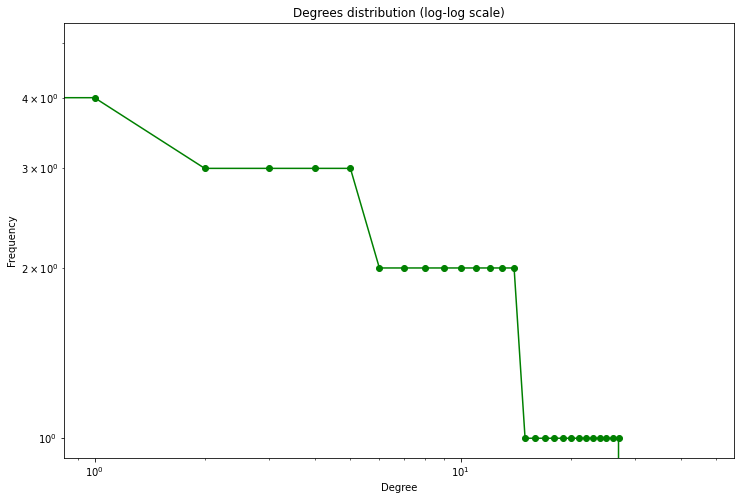

In [11]:
degrees_freq = sorted(nx.degree_histogram(G), reverse=True)
degrees = range(len(degrees_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(degrees, degrees_freq,'-go') 
plt.title("Degrees distribution (log-log scale)")
plt.xlabel('Degree')
plt.ylabel('Frequency')

## Characters' count graph

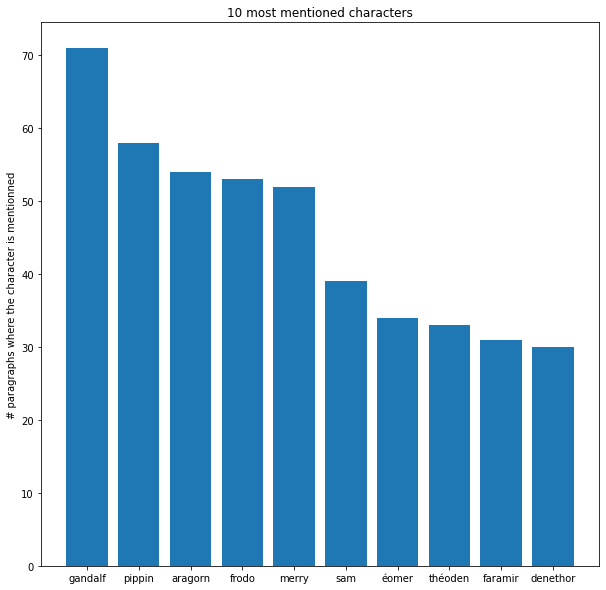

In [23]:
SortedCharOccurencesDic = (dict(sorted(OccurenceList.items(), key=lambda item: item[1], reverse=True)))
plt.bar(x=list(SortedCharOccurencesDic.keys())[:10], height=list(SortedCharOccurencesDic.values())[:10] )
plt.title("10 most mentioned characters")
plt.ylabel("# paragraphs where the character is mentionned")

plt.rcParams['figure.figsize'] = [10, 5]

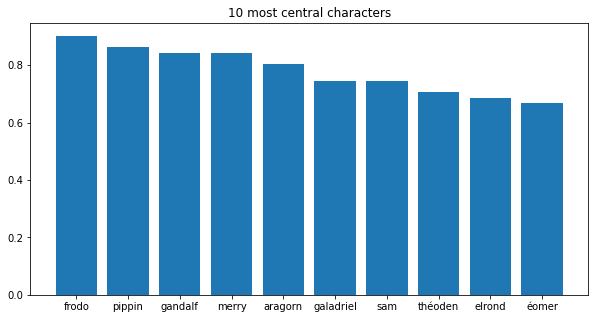

In [13]:
DegrCentr = nx.degree_centrality(G) # return a dictionnary

SortedDegrCentrDic = (dict(sorted(DegrCentr.items(), key=lambda item: item[1], reverse=True)))
plt.bar(x=list(SortedDegrCentrDic.keys())[:10], height=list(SortedDegrCentrDic.values())[:10] )
plt.title("10 most central characters")
#plt.ylabel("# paragraphs where the character is mentionned")

plt.rcParams['figure.figsize'] = [10, 5]

The degree centrality for a node v is the fraction of nodes it is connected to..
The degree centrality values are normalized by dividing by the maximum possible degree in a simple graph n-1 where n is the number of nodes in G.
The graph above is different from the previous graph because it measures the centrality of the characters by the number of unique links rather than naive links count.
More on that on https://www.sciencedirect.com/topics/computer-science/degree-centrality 

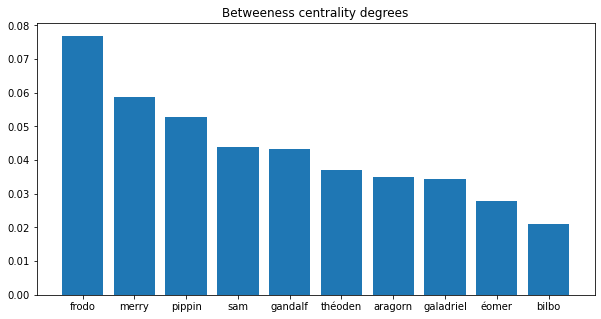

In [14]:
BtwnessCentralityDict = nx.betweenness_centrality(G)
SortedBtwnessCentralityDict= (dict(sorted(BtwnessCentralityDict.items(), key=lambda item: item[1], reverse=True)))
plt.bar(x=list(SortedBtwnessCentralityDict.keys())[:10], height=list(SortedBtwnessCentralityDict.values())[:10] )
plt.title("Betweeness centrality degrees")
#plt.ylabel("# paragraphs where the character is mentionned")

plt.rcParams['figure.figsize'] = [10, 5]

This metric measures how important a node is to the shortest paths through the network.

# Part II: Communities detection

## Louvain Algorithm

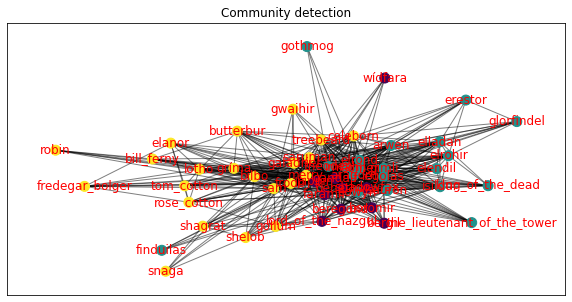

In [24]:
# retrun partition as a dict
partition = louvain.best_partition(G)
# visualization
#pos = nx.spring_layout(G)
pos = nx.spring_layout(G)
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, 
                       pos, 
                       partition.keys(),
                       node_size=100,
                       cmap=cmap,
                       node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G,pos, font_color='r')
plt.title("Community detection")
plt.rcParams['figure.figsize'] = [10,10]
plt.show()

In [16]:
#newDic = dict(sorted(partition.items(), key=lambda item: item[1]))
print(dict(sorted(partition.items(), key=lambda item: item[1])))



{'imrahil': 0, 'elendil': 0, 'théoden': 0, 'aragorn': 0, 'treebeard': 0, 'legolas': 0, 'gimli': 0, 'éomer': 0, 'elladan': 0, 'elrohir': 0, 'elrond': 0, 'éowyn': 0, 'sauron': 0, 'isildur': 0, 'king_of_the_dead': 0, 'gothmog': 0, 'arwen': 0, 'the_lieutenant_of_the_tower': 0, 'finduilas': 0, 'glorfindel': 0, 'erestor': 0, 'celeborn': 0, 'pippin': 1, 'gandalf': 1, 'shadowfax': 1, 'denethor': 1, 'boromir': 1, 'faramir': 1, 'beregond': 1, 'bergil': 1, 'lord_of_the_nazgul': 1, 'wídfara': 1, 'frodo': 2, 'merry': 2, 'saruman': 2, 'galadriel': 2, 'sam': 2, 'gríma': 2, 'gollum': 2, 'bilbo': 2, 'shelob': 2, 'shagrat': 2, 'snaga': 2, 'rose_cotton': 2, 'gwaihir': 2, 'butterbur': 2, 'bill_ferny': 2, 'lotho': 2, 'robin': 2, 'tom_cotton': 2, 'fredegar_bolger': 2, 'elanor': 2}


In [17]:
LouvainOutputModularity = louvain.modularity(partition, G)
print("modularity: " + str(round(LouvainOutputModularity,3)))

modularity: 0.153


In [18]:
Dendro = louvain.generate_dendrogram(G)
Dendro

[{'pippin': 0,
  'gandalf': 0,
  'shadowfax': 0,
  'frodo': 2,
  'denethor': 0,
  'boromir': 0,
  'imrahil': 1,
  'elendil': 1,
  'théoden': 1,
  'aragorn': 1,
  'faramir': 0,
  'merry': 2,
  'saruman': 2,
  'treebeard': 1,
  'beregond': 0,
  'bergil': 0,
  'legolas': 1,
  'gimli': 1,
  'éomer': 1,
  'elladan': 1,
  'elrohir': 1,
  'elrond': 1,
  'galadriel': 2,
  'éowyn': 1,
  'sauron': 1,
  'isildur': 1,
  'king_of_the_dead': 1,
  'sam': 2,
  'gríma': 2,
  'gollum': 2,
  'lord_of_the_nazgul': 0,
  'wídfara': 0,
  'gothmog': 1,
  'arwen': 1,
  'the_lieutenant_of_the_tower': 1,
  'bilbo': 2,
  'shelob': 2,
  'shagrat': 2,
  'snaga': 2,
  'rose_cotton': 2,
  'gwaihir': 2,
  'finduilas': 1,
  'glorfindel': 1,
  'erestor': 1,
  'celeborn': 1,
  'butterbur': 2,
  'bill_ferny': 2,
  'lotho': 2,
  'robin': 2,
  'tom_cotton': 2,
  'fredegar_bolger': 2,
  'elanor': 2}]

A dendrogram is a tree and each level is a partition of the graph nodes. Level 0 is the first partition, which contains the smallest communities, and the best is len(dendrogram) - 1. The higher the level is, the bigger are the communities

In [19]:
PartiChracters =  louvain.partition_at_level(Dendro, len(Dendro) - 1)
sorted(PartiChracters.items(), key=lambda kv: kv[1])

[('pippin', 0),
 ('gandalf', 0),
 ('shadowfax', 0),
 ('denethor', 0),
 ('boromir', 0),
 ('faramir', 0),
 ('beregond', 0),
 ('bergil', 0),
 ('lord_of_the_nazgul', 0),
 ('wídfara', 0),
 ('imrahil', 1),
 ('elendil', 1),
 ('théoden', 1),
 ('aragorn', 1),
 ('treebeard', 1),
 ('legolas', 1),
 ('gimli', 1),
 ('éomer', 1),
 ('elladan', 1),
 ('elrohir', 1),
 ('elrond', 1),
 ('éowyn', 1),
 ('sauron', 1),
 ('isildur', 1),
 ('king_of_the_dead', 1),
 ('gothmog', 1),
 ('arwen', 1),
 ('the_lieutenant_of_the_tower', 1),
 ('finduilas', 1),
 ('glorfindel', 1),
 ('erestor', 1),
 ('celeborn', 1),
 ('frodo', 2),
 ('merry', 2),
 ('saruman', 2),
 ('galadriel', 2),
 ('sam', 2),
 ('gríma', 2),
 ('gollum', 2),
 ('bilbo', 2),
 ('shelob', 2),
 ('shagrat', 2),
 ('snaga', 2),
 ('rose_cotton', 2),
 ('gwaihir', 2),
 ('butterbur', 2),
 ('bill_ferny', 2),
 ('lotho', 2),
 ('robin', 2),
 ('tom_cotton', 2),
 ('fredegar_bolger', 2),
 ('elanor', 2)]

## K-Core Decompositon

In [20]:
# Dictionnaire qui regroupe tous les personnages, et le nombre de contact qu'ils ont

FirstCleanedCharacters = []
for perso in cleanedCharacters :
    FirstCleanedCharacters.append(perso[0])

NombreEdge={}

for i in FirstCleanedCharacters :
    #print(i)
    for key in CoocMatrix:
        if key[0] == i :
            #print(key[0])
            NombreEdge[i] = NombreEdge.get(i,0)+1

#print(NombreEdge)


NeighboursOfEachPerso = {}
# Dictionnaire, à chaque personnage i est associé l'ensemble des personnages j lié à i ( voisin de i)
for i in FirstCleanedCharacters :
    for key in CoocMatrix :
        if key[0] == i :
            if i in NeighboursOfEachPerso :
                NeighboursOfEachPerso[i].append(key[1])
            else:
                NeighboursOfEachPerso[i] = [key[1]]


In [21]:
# TEST 

a = [1,2,3,4,5]

b = a.pop(0)
#print(a)
#print(b)


pruned =[False]*52
#print(pruned)
#print(len(pruned))

pruned = {}
for i in FirstCleanedCharacters :
    pruned[i] = False
    
print(len(pruned))


52


In [22]:
# Initialisation

pruned = {}
for i in FirstCleanedCharacters :
    pruned[i] = False


total_pruned = 0
k=1
shell = []
pruned =[false]*52



#Algorithm :

while total_pruned < size(NombreEdge):# We need G = dictionnaire qui regroupe tous les personnages, et le nombre de contact qu'ils ont
    to_prune = []
    for key in NombreEdge :
        if NombreEdge[key] == k :
            to_prune.append(key)
            k_shell = []
            while len(to_prune)>0:
                i = to_prune.pop(0)
                for j in NeighboursOfEachPerso[i]:
                    if pruned[j] == False :
                        
                    
                
                
    

""""
#Initialisation
neigh[i] ⇽ list of neighbours of node i
deg[i] ⇽ degree of node i
pruned[i] ⇽ false for each node i
k ⇽ 1
total_pruned ⇽ 0

#Algorithm
while (total_pruned < size(G)):
to_prune ⇽ list([i for i in G where deg[i] = k])
k_shell ⇽ [ ]
while len(to_prune) > 0:
i ⇽ to_prune.pop(0)
for j in neighbours[i]:
if pruned[j] is false:
degree[j] ⇽ degree[j] -1
if degree[j] == k:
to_prune.append(j)
pruned[i] = True
k_shell.append(i)
total_pruned ⇽ total_pruned + 1
store(k_shell)
k ⇽ k+1"""


IndentationError: expected an indented block (815956802.py, line 33)